<a href="https://colab.research.google.com/github/umas-iit/Python-Examples/blob/main/MAJOR_PROJECT_2018Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
pd.set_option('display.max_rows', None)
import statistics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = nc.Dataset('/content/drive/MyDrive/datasets/RF25_IMD0p252018.nc')
#data = nc.Dataset('/content/RF25_IMD0p252019.nc')


###data variable contains the nc dataset considered

In [ ]:
print(data.variables.keys())

dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])


In [ ]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V6.9   13-Jan-21
    Conventions: CF-1.0
    dimensions(sizes): LONGITUDE(135), LATITUDE(129), TIME(365)
    variables(dimensions): float64 LONGITUDE(LONGITUDE), float64 LATITUDE(LATITUDE), float64 TIME(TIME), float32 RAINFALL(TIME, LATITUDE, LONGITUDE)
    groups: 


Description:


1.   Longitude: The shape of longitude variable in nc dataset is 135 which indicates there are 135 different longitudinal values (data points)
2.   Latitude: The shape of latitude variable in nc dataset is 129 which indicates that there are 129 different latitudinal values.
3. Time: The shape of time variable is 365 which means taht the dataset contains data of 1 non leap year.
4. Rainfall: The Rainfall variable depends on all the three factors described above(longitude,latitude,time). 

A certain location has one longitude value and one latitude value for which the rainfall varies by time. 



In [ ]:
lon = data.variables['LONGITUDE']
print(lon)

<class 'netCDF4._netCDF4.Variable'>
float64 LONGITUDE(LONGITUDE)
    units: degrees_east
    point_spacing: even
    axis: X
    modulo: 360.0
    standard_name: longitude
unlimited dimensions: 
current shape = (135,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
lat = data.variables['LATITUDE']
print(lat)

<class 'netCDF4._netCDF4.Variable'>
float64 LATITUDE(LATITUDE)
    units: degrees_north
    point_spacing: even
    axis: Y
    standard_name: latitude
unlimited dimensions: 
current shape = (129,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
time = data.variables['TIME']
print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    units: days since 1900-12-31 00:00:00
    axis: T
    time_origin: 31-DEC-1900
    standard_name: time
unlimited dimensions: TIME
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
R = data.variables['RAINFALL']
print(R)

<class 'netCDF4._netCDF4.Variable'>
float32 RAINFALL(TIME, LATITUDE, LONGITUDE)
    missing_value: -999.0
    _FillValue: -999.0
    long_name: Rainfall
    units: mm
    history: From ind2018_rfp25.grd
unlimited dimensions: TIME
current shape = (365, 129, 135)
filling on


In [ ]:
time_data = data.variables['TIME'][:]
print(time_data)

[42735. 42736. 42737. 42738. 42739. 42740. 42741. 42742. 42743. 42744.
 42745. 42746. 42747. 42748. 42749. 42750. 42751. 42752. 42753. 42754.
 42755. 42756. 42757. 42758. 42759. 42760. 42761. 42762. 42763. 42764.
 42765. 42766. 42767. 42768. 42769. 42770. 42771. 42772. 42773. 42774.
 42775. 42776. 42777. 42778. 42779. 42780. 42781. 42782. 42783. 42784.
 42785. 42786. 42787. 42788. 42789. 42790. 42791. 42792. 42793. 42794.
 42795. 42796. 42797. 42798. 42799. 42800. 42801. 42802. 42803. 42804.
 42805. 42806. 42807. 42808. 42809. 42810. 42811. 42812. 42813. 42814.
 42815. 42816. 42817. 42818. 42819. 42820. 42821. 42822. 42823. 42824.
 42825. 42826. 42827. 42828. 42829. 42830. 42831. 42832. 42833. 42834.
 42835. 42836. 42837. 42838. 42839. 42840. 42841. 42842. 42843. 42844.
 42845. 42846. 42847. 42848. 42849. 42850. 42851. 42852. 42853. 42854.
 42855. 42856. 42857. 42858. 42859. 42860. 42861. 42862. 42863. 42864.
 42865. 42866. 42867. 42868. 42869. 42870. 42871. 42872. 42873. 42874.
 42875

These are the values present in the time variable. 

These values indicates the number of days since 31 st december 1900.

42735 days after 31-12-1900 is 01-01-2018. So the data is of 2018.

In [ ]:
lon_data = data.variables['LONGITUDE'][:]
print(lon_data)

[ 66.5   66.75  67.    67.25  67.5   67.75  68.    68.25  68.5   68.75
  69.    69.25  69.5   69.75  70.    70.25  70.5   70.75  71.    71.25
  71.5   71.75  72.    72.25  72.5   72.75  73.    73.25  73.5   73.75
  74.    74.25  74.5   74.75  75.    75.25  75.5   75.75  76.    76.25
  76.5   76.75  77.    77.25  77.5   77.75  78.    78.25  78.5   78.75
  79.    79.25  79.5   79.75  80.    80.25  80.5   80.75  81.    81.25
  81.5   81.75  82.    82.25  82.5   82.75  83.    83.25  83.5   83.75
  84.    84.25  84.5   84.75  85.    85.25  85.5   85.75  86.    86.25
  86.5   86.75  87.    87.25  87.5   87.75  88.    88.25  88.5   88.75
  89.    89.25  89.5   89.75  90.    90.25  90.5   90.75  91.    91.25
  91.5   91.75  92.    92.25  92.5   92.75  93.    93.25  93.5   93.75
  94.    94.25  94.5   94.75  95.    95.25  95.5   95.75  96.    96.25
  96.5   96.75  97.    97.25  97.5   97.75  98.    98.25  98.5   98.75
  99.    99.25  99.5   99.75 100.  ]


In [ ]:
lat_data = data.variables['LATITUDE'][:]
print(lat_data)

[ 6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25
  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25
 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.   15.25
 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75 18.   18.25
 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75 21.   21.25
 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75 24.   24.25
 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25
 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75 30.   30.25
 30.5  30.75 31.   31.25 31.5  31.75 32.   32.25 32.5  32.75 33.   33.25
 33.5  33.75 34.   34.25 34.5  34.75 35.   35.25 35.5  35.75 36.   36.25
 36.5  36.75 37.   37.25 37.5  37.75 38.   38.25 38.5 ]


In [ ]:
start_date = '2018-01-01'
end_date = '2018-12-31'
date_range = pd.date_range(start =start_date, end= end_date)

The date_range variable is a list consists of all the dates in the year 2018.

In [ ]:
template = pd.DataFrame(0,columns=['Rainfall in mm'],index = date_range)

The template dataframe consists of two columns:


1.   Date
2.   Rainfall values (currently filled with zero)



In [ ]:
in_c = np.arange(0,time.size)

In [ ]:
def findindexoflat(lat):
  sq_diff_lat = (lat_data-lat)**2
  min_index_lat = sq_diff_lat.argmin()
  return min_index_lat


This function (findindexoflat) will gives the index of closest latitude value of the city considered.

In [ ]:
def findindexoflon(lon):
  sq_diff_lon = (lon_data-lon)**2
  min_index_lon = sq_diff_lon.argmin()
  return min_index_lon

This function (findindexoflon) will gives the index of closest longitude value of the city considered

In [ ]:
def convert(lat,lon,name):
  for i in in_c:
    template.iloc[i] = R[i,lat,lon]
  template.to_csv(name)

The function will add the values of the rainfall in the template dataframe created and after adding the values it converts the dataframe to the csv file

This function will take three parmeters:


1.   lat: this is the value returned from the function findindexoflan
2.   lon: this is the value returned from the function findindexoflon
3. name: this parameter will give name to the csv file according to the city.



In [ ]:
#blore,vizag,hubli

latitude = [12.972442,17.686815,15.371598]
longitude=[77.580643,83.218483,75.101166]
for i in range(3):
  latitude_index = findindexoflat(latitude[i])
  longitude_index = findindexoflon(longitude[i])
  if(i==0):
    name = 'Rainfall_Bangalore.csv'
  elif(i==1):
    name = 'Rainfall_Vizag.csv'
  else:
    name = 'Rainfall_Hubli.csv'
  convert(latitude_index,longitude_index,name)



latitude list contains the values of city latitudes [Bangalore,Vizag,Hubli]

Similarly longitude list contains the values of city longitude.

After this cell runs every function described will run and finally it gives the csv files of rainfall values for three cities considered.

In [ ]:
blore_rainfall_dataset = pd.read_csv('/content/Rainfall_Bangalore.csv')
vizag_rainfall_dataset = pd.read_csv('/content/Rainfall_Vizag.csv')
hubli_rainfall_dataset = pd.read_csv('/content/Rainfall_Hubli.csv')

In [ ]:
blore_rainfall_dataset.columns = ['Date','Blore rainfall']
vizag_rainfall_dataset.columns = ['Date','Vizag rainfall']
hubli_rainfall_dataset.columns = ['Date','Hubli rainfall']

In [ ]:
dataset = blore_rainfall_dataset.copy()

In [ ]:
dataset['Vizag rainfall'] = vizag_rainfall_dataset['Vizag rainfall']
dataset['Hubli rainfall'] = hubli_rainfall_dataset['Hubli rainfall']

Created a Dataframe named dataset which contains the rainfall data of three citites.

In [ ]:
dataset

,Date,Blore rainfall,Vizag rainfall,Hubli rainfall
0,2018-01-01,0.000000,0.000000,0.000000
1,2018-01-02,0.000000,0.000000,0.000000
2,2018-01-03,0.000000,0.000000,0.000000
3,2018-01-04,0.000000,0.000000,0.000000
4,2018-01-05,0.000000,0.000000,0.000000
5,2018-01-06,0.000000,0.000000,0.000000
6,2018-01-07,0.000000,0.000000,0.000000
7,2018-01-08,0.000000,0.000000,0.000000
8,2018-01-09,0.000000,0.000000,0.000000
9,2018-01-10,0.000000,0.000000,0.000000


In [ ]:
x = dataset['Date']
y1 = dataset['Blore rainfall']
y2 = dataset['Vizag rainfall']
y3 = dataset['Hubli rainfall']

Text(0, 0.5, 'Rainfall in mm')

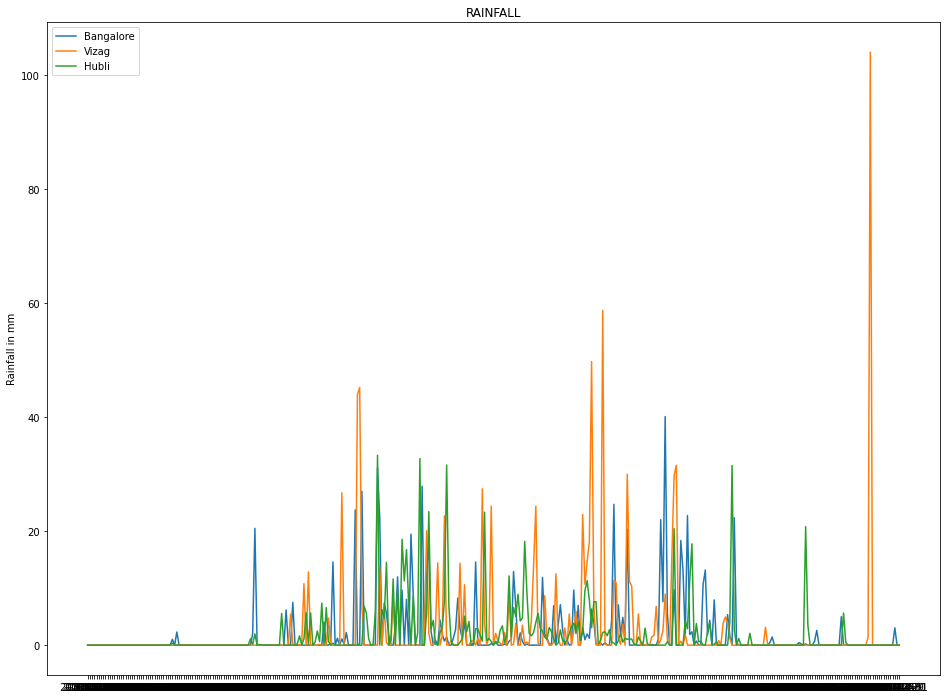

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title('RAINFALL')
plt.legend(['Bangalore','Vizag','Hubli'])
plt.ylabel('Rainfall in mm')

In [ ]:
date = list(dataset['Date'])

In [ ]:
for i in range(len(date)):
  if(date[i][5:7]=='01'):
    date[i] = 'Jan'
  elif(date[i][5:7]=='02'):
    date[i] = 'Feb'
  elif(date[i][5:7]=='03'):
    date[i] = 'Mar'
  elif(date[i][5:7]=='04'):
    date[i] = 'Apr'
  elif(date[i][5:7]=='05'):
    date[i] = 'May'
  elif(date[i][5:7]=='06'):
    date[i] = 'Jun'
  elif(date[i][5:7]=='07'):
    date[i] = 'Jul'
  elif(date[i][5:7]=='08'):
    date[i] = 'Aug'
  elif(date[i][5:7]=='09'):
    date[i] = 'Sep'
  elif(date[i][5:7]=='10'):
    date[i] = 'Oct'
  elif(date[i][5:7]=='11'):
    date[i] = 'Nov'
  elif(date[i][5:7]=='12'):
    date[i] = 'Dec'

We have created a list which contains all the dates in it and after we have converted the dates into months by checking the month number in the date. 

In [ ]:
dataset['Month'] = date

In [ ]:
x = list(dataset['Month'])
y1 = list(dataset['Blore rainfall'])
y2 = list(dataset['Vizag rainfall'])
y3 = list(dataset['Hubli rainfall'])

In [ ]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
blore_monthly_avg_list=[]
vizag_monthly_avg_list=[]
hubli_monthly_avg_list=[]
for i in range(len(month)):
  count=0
  blore_sum=0
  vizag_sum=0
  hubli_sum=0
  for j in range(len(x)):
    if(month[i]==x[j]):
      blore_sum+=y1[j]
      vizag_sum+=y2[j]
      hubli_sum+=y3[j]
      count+=1
  blore_monthly_avg_list.append(blore_sum/count)
  vizag_monthly_avg_list.append(vizag_sum/count)
  hubli_monthly_avg_list.append(hubli_sum/count)
  

Here we are adding monthly average rainfall values of different cities and adding the values into respective city lists.

In [ ]:
columns = ['Month','Blore monthly avg','Vizag monthly avg','Hubli monthly avg']
dataset_monthly_avg = pd.DataFrame(columns = columns)

In [ ]:
dataset_monthly_avg['Month']=month
dataset_monthly_avg['Blore monthly avg'] = blore_monthly_avg_list
dataset_monthly_avg['Vizag monthly avg'] = vizag_monthly_avg_list
dataset_monthly_avg['Hubli monthly avg'] = hubli_monthly_avg_list

In [ ]:
dataset_monthly_avg

,Month,Blore monthly avg,Vizag monthly avg,Hubli monthly avg
0,Jan,0.000000,0.000000,0.000000
1,Feb,0.119267,0.000000,0.012063
2,Mar,0.923817,0.000000,0.286284
3,Apr,1.043105,2.033685,1.094307
4,May,6.724520,4.021209,6.371469
5,Jun,2.599198,4.172203,4.515725
6,Jul,1.652070,3.697479,3.574430
7,Aug,3.646929,8.276327,2.807790
8,Sep,4.867264,4.326697,2.161809
9,Oct,2.208033,0.473736,1.727313


###Plotting monthly average graphs

In [ ]:
x = dataset_monthly_avg['Month']
y1 = dataset_monthly_avg['Blore monthly avg']
y2 = dataset_monthly_avg['Vizag monthly avg']
y3 = dataset_monthly_avg['Hubli monthly avg']

Text(0.5, 1.0, 'Average Rainfall in Bangalore per month')

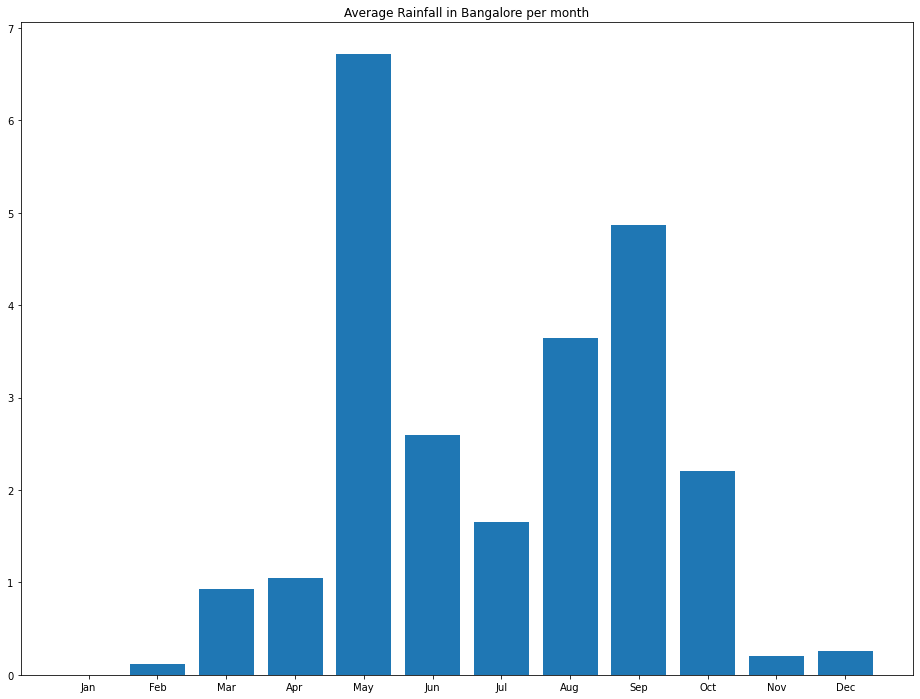

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(x,y1)
plt.title('Average Rainfall in Bangalore per month')

Text(0.5, 1.0, 'Rainfall in Vizag per month')

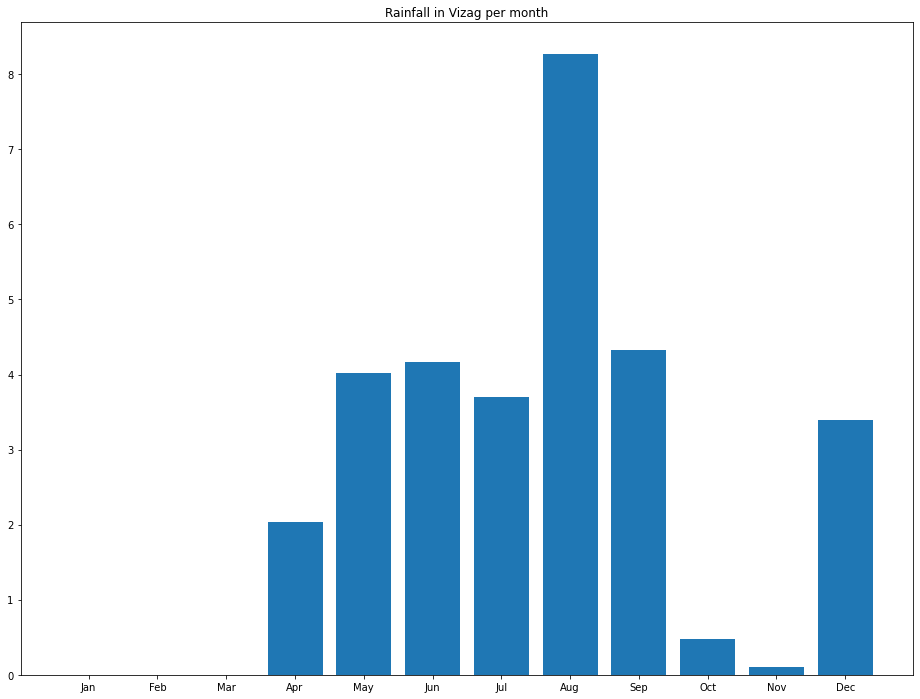

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(x,y2)
plt.title('Rainfall in Vizag per month')

Text(0.5, 1.0, 'Rainfall in Hubli per month')

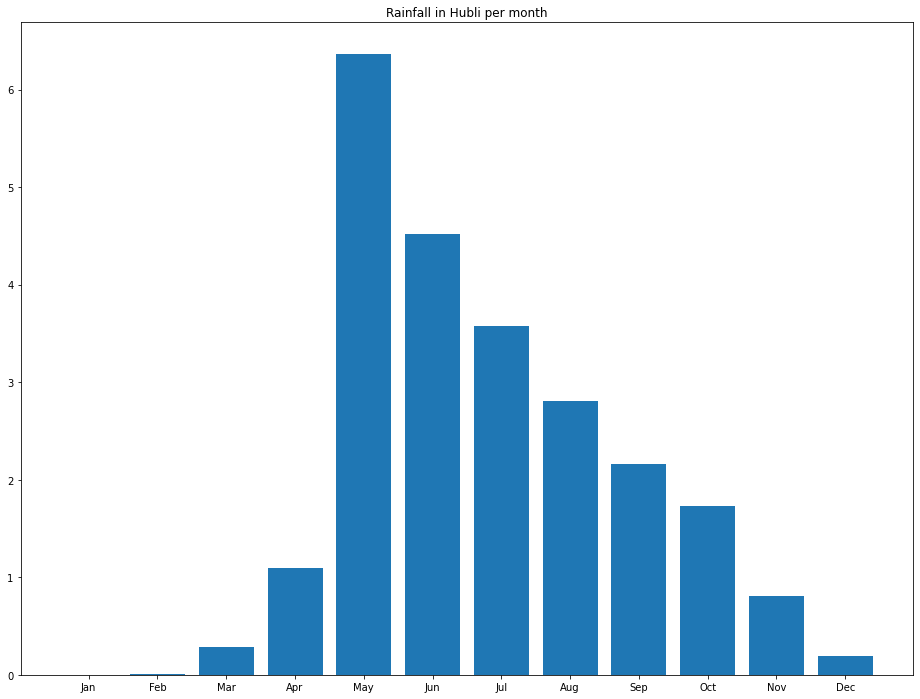

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(x,y3)
plt.title('Rainfall in Hubli per month')

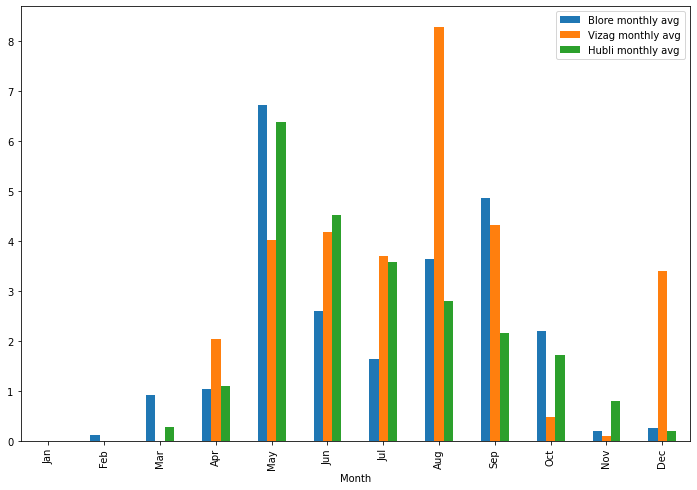

In [ ]:
dataset_monthly_avg.plot('Month', ['Blore monthly avg','Vizag monthly avg','Hubli monthly avg'],kind="bar",figsize=(12,8))

###Plotting average yearly rainfall of three cities

In [ ]:
avg_year_rainfall_list = []
avg_year_rainfall_list.append(dataset_monthly_avg['Blore monthly avg'].mean())
avg_year_rainfall_list.append(dataset_monthly_avg['Vizag monthly avg'].mean())
avg_year_rainfall_list.append(dataset_monthly_avg['Hubli monthly avg'].mean())

<BarContainer object of 3 artists>

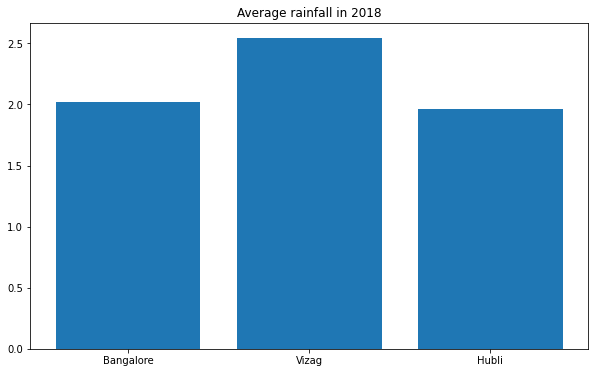

In [ ]:
cities = ['Bangalore','Vizag','Hubli']
plt.figure(figsize = (10,6))
plt.title('Average rainfall in 2018')
plt.bar(cities,avg_year_rainfall_list)

###Plotting annual sum rainfall

In [ ]:
blore_rainfall = list(dataset['Blore rainfall'])
vizag_rainfall = list(dataset['Vizag rainfall'])
hubli_rainfall = list(dataset['Hubli rainfall'])

In [ ]:
sum_annual_rainfall = [sum(blore_rainfall),sum(vizag_rainfall),sum(hubli_rainfall)]

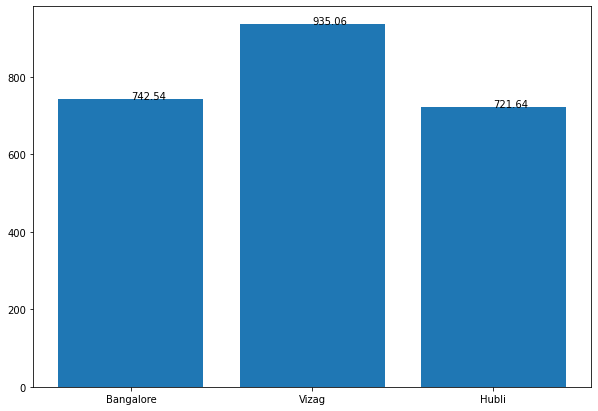

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(cities,sum_annual_rainfall)
for i in range(3):
  plt.text(i,sum_annual_rainfall[i],"{:.2f}".format(sum_annual_rainfall[i]))

###Plotting south west monsoon ( May - Sept)

In [ ]:
south_west = ['May','Jun','Jul','Aug','Sep']
blore_south_west=[]
hubli_south_west = []
vizag_south_west = []
for i in south_west:
  k=0
  b=0
  h=0
  v=0
  for j in range(len(date)):
    if(i==date[j]):
      k+=1
      b+=blore_rainfall[j]
      h+=hubli_rainfall[j]
      v+=vizag_rainfall[j]
      if(date[j+1]!=i):
        break
  blore_south_west.append(b/k)
  hubli_south_west.append(h/k)
  vizag_south_west.append(v/k)

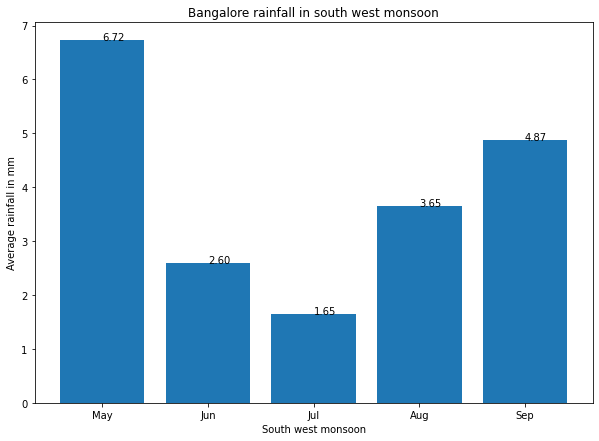

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Bangalore rainfall in south west monsoon')
plt.xlabel('South west monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(south_west,blore_south_west)
for i in range(len(south_west)):
  plt.text(i,blore_south_west[i],"{:.2f}".format(blore_south_west[i]))

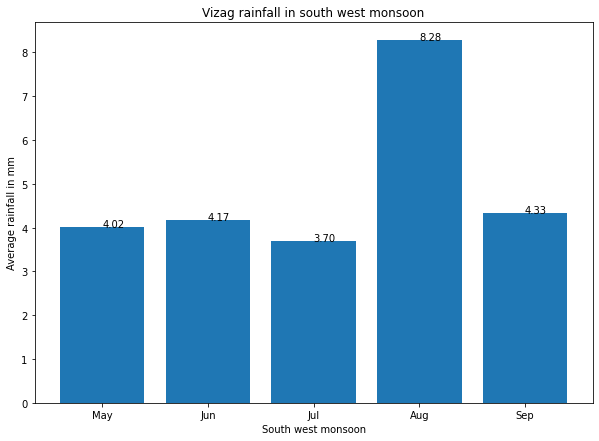

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Vizag rainfall in south west monsoon')
plt.xlabel('South west monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(south_west,vizag_south_west)
for i in range(len(south_west)):
  plt.text(i,vizag_south_west[i],"{:.2f}".format(vizag_south_west[i]))

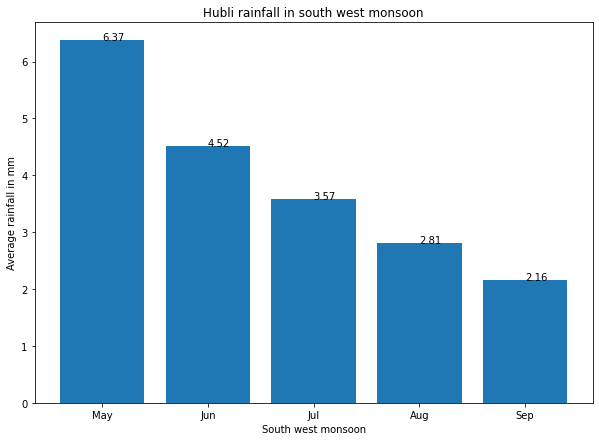

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Hubli rainfall in south west monsoon')
plt.xlabel('South west monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(south_west,hubli_south_west)
for i in range(len(south_west)):
  plt.text(i,hubli_south_west[i],"{:.2f}".format(hubli_south_west[i]))

In [ ]:
south_west_mean = [statistics.mean(blore_south_west),statistics.mean(vizag_south_west),statistics.mean(hubli_south_west)]

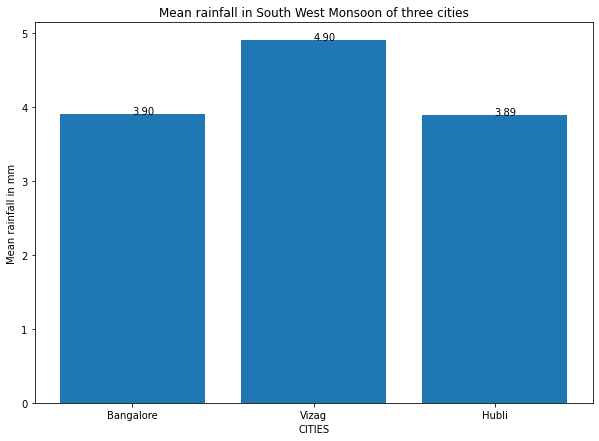

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Mean rainfall in South West Monsoon of three cities')
plt.xlabel('CITIES')
plt.ylabel('Mean rainfall in mm')
plt.bar(cities,south_west_mean)
for i in range(3):
  plt.text(i,south_west_mean[i],"{:.2f}".format(south_west_mean[i]))

###Plotting north east monsoon data (oct - nov)

In [ ]:
north_east = ['Oct','Nov','Dec']
blore_north_east=[]
hubli_north_east = []
vizag_north_east = []
for i in north_east:
  k=0
  b=0
  h=0
  v=0
  for j in range(len(date)):
    if(i==date[j]):
      k+=1
      b+=blore_rainfall[j]
      h+=hubli_rainfall[j]
      v+=vizag_rainfall[j]
      
  blore_north_east.append(b/k)
  hubli_north_east.append(h/k)
  vizag_north_east.append(v/k)

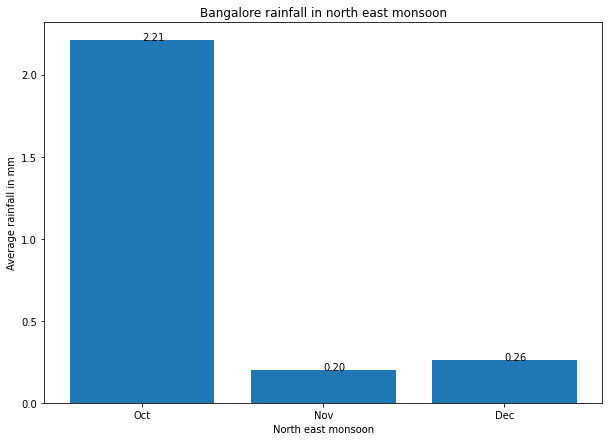

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Bangalore rainfall in north east monsoon')
plt.xlabel('North east monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(north_east,blore_north_east)
for i in range(len(north_east)):
  plt.text(i,blore_north_east[i],"{:.2f}".format(blore_north_east[i]))

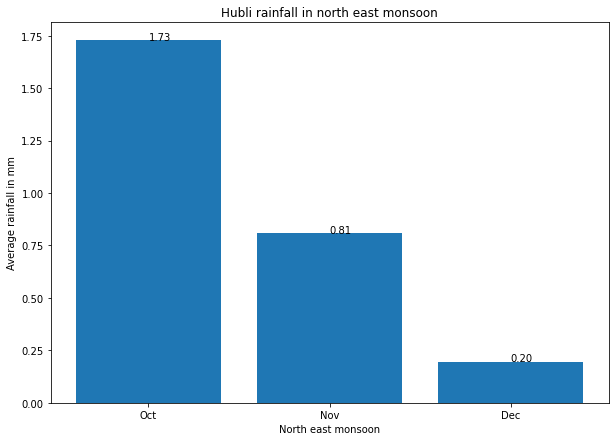

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Hubli rainfall in north east monsoon')
plt.xlabel('North east monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(north_east,hubli_north_east)
for i in range(len(north_east)):
  plt.text(i,hubli_north_east[i],"{:.2f}".format(hubli_north_east[i]))

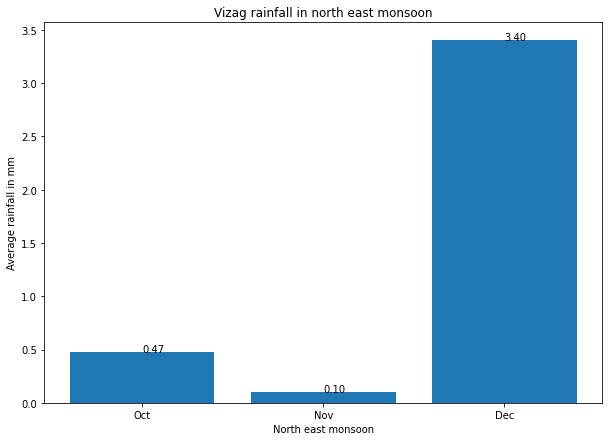

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Vizag rainfall in north east monsoon')
plt.xlabel('North east monsoon')
plt.ylabel('Average rainfall in mm')
plt.bar(north_east,vizag_north_east)
for i in range(len(north_east)):
  plt.text(i,vizag_north_east[i],"{:.2f}".format(vizag_north_east[i]))

In [ ]:
north_east_mean = [statistics.mean(blore_north_east),statistics.mean(vizag_north_east),statistics.mean(hubli_north_east)]

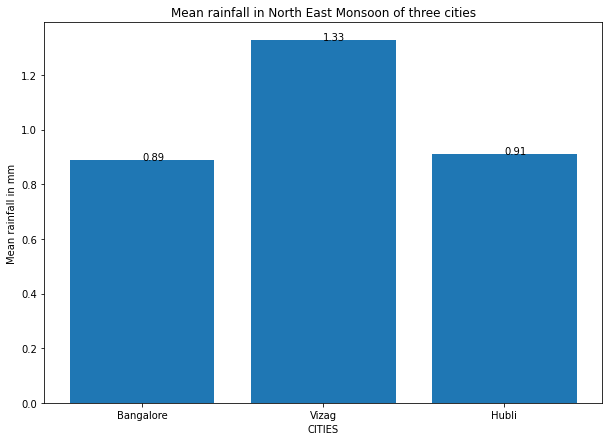

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Mean rainfall in North East Monsoon of three cities')
plt.xlabel('CITIES')
plt.ylabel('Mean rainfall in mm')
plt.bar(cities,north_east_mean)
for i in range(3):
  plt.text(i,north_east_mean[i],"{:.2f}".format(north_east_mean[i]))

###VARIANCE

In [ ]:
blore_variance = statistics.variance(blore_south_west)
hubli_variance = statistics.variance(hubli_south_west)
vizag_variance = statistics.variance(vizag_south_west)

In [ ]:
variance = [blore_variance,vizag_variance,hubli_variance]

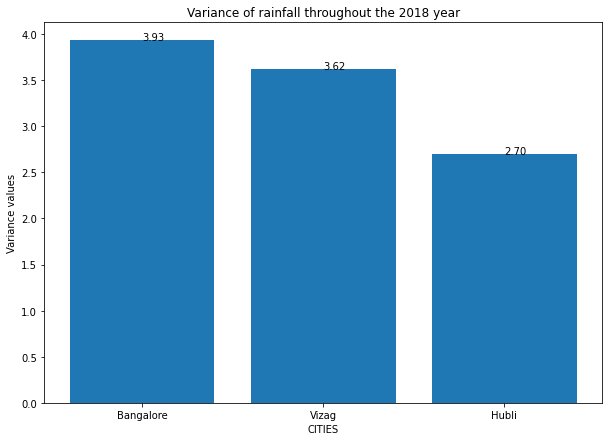

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Variance of rainfall throughout the 2018 year')
plt.xlabel('CITIES')
plt.ylabel('Variance values')
plt.bar(cities,variance)
for i in range(3):
  plt.text(i,variance[i],"{:.2f}".format(variance[i]))

###MOVING AVERAGE

In [ ]:
blore_moving_avg = []
vizag_moving_avg = []
hubli_moving_avg = []
x=[]

In [ ]:
for i in range(363):
  x.append(i)

In [ ]:
for i in range(len(blore_rainfall)-2):
  l1 = blore_rainfall[i:i+3]
  blore_moving_avg.append(statistics.mean(l1))


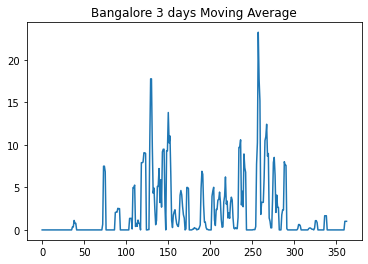

In [ ]:
plt.title('Bangalore 3 days Moving Average')
plt.plot(x,blore_moving_avg)

In [ ]:
for i in range(len(vizag_rainfall)-2):
  l1 = vizag_rainfall[i:i+3]
  vizag_moving_avg.append(statistics.mean(l1))

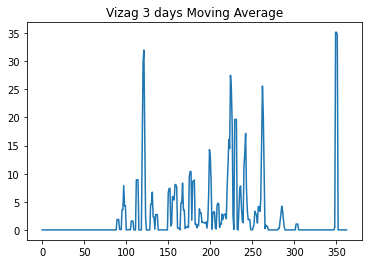

In [ ]:
plt.title('Vizag 3 days Moving Average')
plt.plot(x,vizag_moving_avg)

In [ ]:
for i in range(len(hubli_rainfall)-2):
  l1 = hubli_rainfall[i:i+3]
  hubli_moving_avg.append(statistics.mean(l1))

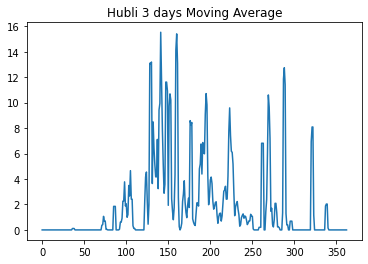

In [ ]:
plt.title('Hubli 3 days Moving Average')
plt.plot(x,hubli_moving_avg)

In [ ]:
hubli_dataset = pd.read_csv('/content/Rainfall_Hubli.csv',index_col=[0],parse_dates=[0])
blore_dataset = pd.read_csv('/content/Rainfall_Bangalore.csv',index_col=[0],parse_dates=[0])
vizag_dataset = pd.read_csv('/content/Rainfall_Vizag.csv',index_col=[0],parse_dates=[0])

In [ ]:
blore_list = list(blore_dataset['Rainfall in mm'])
vizag_list = list(vizag_dataset['Rainfall in mm'])
hubli_list = list(hubli_dataset['Rainfall in mm'])

In [ ]:
blore_series = np.array(blore_list[120:273])
vizag_series = np.array(vizag_list[120:273])
hubli_series = np.array(hubli_list[120:273])

The below function checks whether the series is stationary or not.

In [ ]:
def checkStationary(series):
  a = adfuller(series)
  return(a[1])

In [ ]:
blore_check = checkStationary(blore_series)
vizag_check = checkStationary(vizag_series)
hubli_check = checkStationary(hubli_series)

In [ ]:
print('Bangalore:',blore_check)
print('Vizag:',vizag_check)
print('Hubli:',hubli_check)

Bangalore: 8.884157080789076e-12
Vizag: 3.711458985338634e-17
Hubli: 3.751707857662139e-20


The function below checks for which parameters the model is giving less aic score we will return those parameters to feed the ARIMA model.

In [ ]:
def findParameters(train,test):
  p=range(0,8)
  q = range(0,8)
  d = (0,2)
  pdq_combinations = list(itertools.product(p,d,q))
  order=[]
  aic_list=[]
  for pdq in pdq_combinations:
    try:
      model = ARIMA(train,order=pdq).fit()
      aic = model.aic
      aic_list.append(aic)
      order.append(pdq)
    except:
      continue
  min_aic = min(aic_list)
  index = aic_list.index(min_aic)
  return(order[index])

Bangalore Forecast graph

In [ ]:
blore_train = blore_dataset[120:242]
blore_test = blore_dataset[242:273]
test = blore_dataset['Rainfall in mm'][242:273]

In [ ]:
blore_pdq=findParameters(blore_train,blore_test)

In [ ]:
blore_model = ARIMA(blore_train,order=blore_pdq)

In [ ]:
blore_model_fit = blore_model.fit()

In [ ]:
blore_model_fit.aic

805.5305934439182

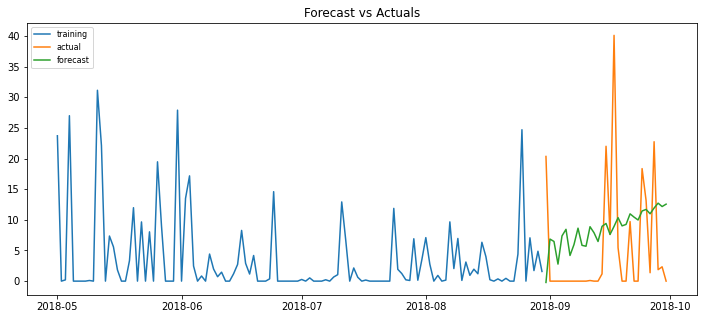

In [ ]:
#vizag_forecast = vizag_model_fit.forecast(steps=35)[0]
fc, se, conf = blore_model_fit.forecast(31, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(blore_train, label='training')
plt.plot(blore_test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Vizag Forecast graph

In [ ]:
vizag_train = vizag_dataset[120:242]
vizag_test = vizag_dataset[242:273]
test = vizag_dataset['Rainfall in mm'][242:273]

In [ ]:
vizag_pdq=findParameters(vizag_train,vizag_test)

In [ ]:
vizag_model = ARIMA(vizag_train,order=vizag_pdq)

In [ ]:
vizag_model_fit = vizag_model.fit()

In [ ]:
vizag_model_fit.aic

917.4372741013282

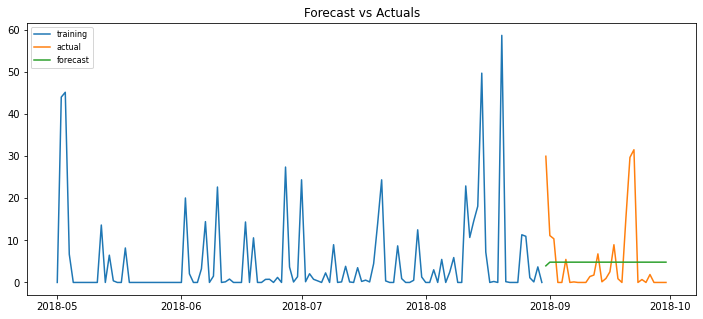

In [ ]:
#vizag_forecast = vizag_model_fit.forecast(steps=35)[0]
fc, se, conf = vizag_model_fit.forecast(31, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(vizag_train, label='training')
plt.plot(vizag_test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Hubli forecast Graph

In [ ]:
hubli_train = hubli_dataset[120:242]
hubli_test = hubli_dataset[242:273]
test = hubli_dataset['Rainfall in mm'][242:273]

In [ ]:
hubli_pdq=findParameters(hubli_train,hubli_test)

In [ ]:
hubli_model = ARIMA(hubli_train,order=hubli_pdq)

In [ ]:
hubli_model_fit = hubli_model.fit()

In [ ]:
hubli_model_fit.aic

805.4692246978719

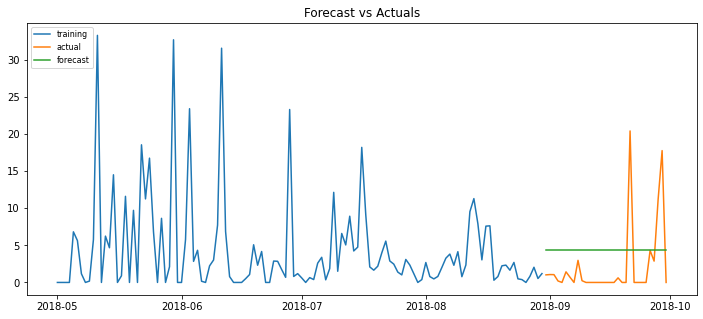

In [ ]:
#vizag_forecast = vizag_model_fit.forecast(steps=35)[0]
fc, se, conf = hubli_model_fit.forecast(31, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(hubli_train, label='training')
plt.plot(hubli_test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()